In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt

from simulation import *
from source import *
from aux_observation import *
from true_data import *
from pointing import *

In [2]:
filename_gamma = './dl2_gamma-diffuse_testing.h5'
filename_proton = './dl2_proton_testing.h5'

In [3]:
sim = simulation_object(filename_gamma, filename_proton)

In [4]:
src = source_object(shape="gauss")
#src = source_object()

In [5]:
obs = observation(sim, src)

In [6]:
#new_obs = observation(sim,src,time_start='2022-01-16T23:00:00', time_stop='2022-01-16T23:20:00' )
#trajectory = pointing(sim,src,new_obs, Zd_size = 30, Az_size= 65)
#az_tel = (sim.data['az_tel'].to_numpy() * u.rad).to(u.deg).value
#zd_tel = ( 90 * u.deg - (sim.data['alt_tel'].to_numpy() * u.rad).to(u.deg) ).value

#events = trajectory.events(az_tel, zd_tel)

## Spatial Weights

In [7]:
src_disk = source_object(shape="disk")
src_gauss = source_object(shape="gauss")
src_ring = source_object(rmin=0.5*u.deg)

obs_disk = observation(sim, src_disk)
obs_gauss = observation(sim, src_gauss)
obs_ring = observation(sim, src_ring)

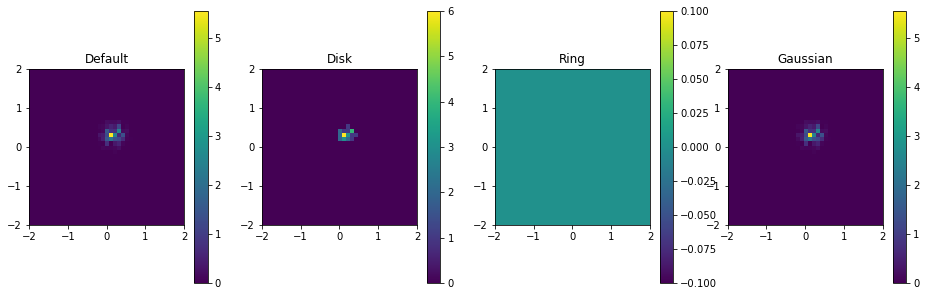

In [8]:
plt.figure(figsize=(16, 5))
plt.subplot(141, aspect='equal')
plt.hist2d(
    sim.cam_x.to('deg').value,
    sim.cam_y.to('deg').value,
    bins=110,
    weights= obs.spatial_weights(sim.cam_x, sim.cam_y),
    #vmax=20
)
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.title('Default')
plt.colorbar();

plt.subplot(142, aspect='equal')
plt.hist2d(
    sim.cam_x.to('deg').value,
    sim.cam_y.to('deg').value,
    bins=110,
    weights= obs_disk.spatial_weights(sim.cam_x, sim.cam_y),
    #vmax=20
)
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.title('Disk')
plt.colorbar();

plt.subplot(143, aspect='equal')
plt.hist2d(
    sim.cam_x.to('deg').value,
    sim.cam_y.to('deg').value,
    bins=110,
    weights= obs_ring.spatial_weights(sim.cam_x, sim.cam_y),
    #vmax=20
)
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.title('Ring')
plt.colorbar();

plt.subplot(144, aspect='equal')
plt.hist2d(
    sim.cam_x.to('deg').value,
    sim.cam_y.to('deg').value,
    bins=110,
    weights= obs_gauss.spatial_weights(sim.cam_x, sim.cam_y),
    #vmax=20
)
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.title('Gaussian')
plt.colorbar();

## Final Weight

In [9]:
binning = [0.01, 0.01547327, 0.023942209, 0.037046426, 0.057322935, 0.088697325, 0.13724377, 0.21236099, 
        0.32859189, 0.5084391, 0.78672155, 1.2173155, 1.8835851, 2.9145222, 4.5097188, 6.9780098, 10.797263, 16.706896, 
        25.851032, 40]
src_cutoff = source_object(spectrum_parameters = src.cutoff_spectrum_parameters) 
src_powerlaw = source_object(spectrum_parameters = src.powerlaw_spectrum_parameters)
obs_disk = observation(sim, src_disk)
obs_ring = observation(sim, src_ring)
obs_gauss = observation(sim, src_gauss)
obs_cutoff = observation(sim, src_cutoff)
obs_powerlaw = observation(sim, src_powerlaw)

TypeError: tuple indices must be integers or slices, not str

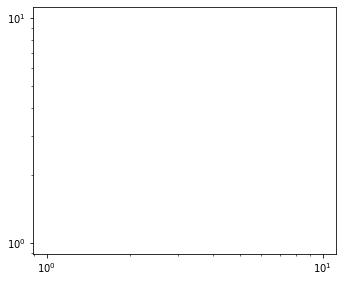

In [10]:
plt.figure(figsize=(25, 10))

plt.subplot(241)
plt.semilogy()
plt.semilogx()
plt.hist(
    obs.final_sim()['mc_energy'],
    bins= binning,
    label="log-parabola, ring {0.1-0.7}"
)
plt.legend()
plt.ylim(1, 5000)
plt.title('Changement of spatial weights');

plt.subplot(242)
plt.semilogy()
plt.semilogx()
plt.hist(
    obs_disk.final_sim()['mc_energy'],
    bins= binning,
    label="disk of 0.7 deg"
)
plt.ylim(1, 5000)
plt.legend();


plt.subplot(243)
plt.semilogy()
plt.semilogx()
plt.hist(
    obs_ring.final_sim()['mc_energy'],
    bins= binning,
    label="ring {0.5-0.7}"
)
plt.ylim(1, 5000)
plt.legend();


plt.subplot(244)
plt.semilogy()
plt.semilogx()
plt.hist(
    obs_gauss.final_sim()['mc_energy'],
    bins= binning,
    label="gauss sig=0.7"
)
plt.ylim(1, 5000)
plt.legend();

plt.subplot(245)
plt.semilogy()
plt.semilogx()
plt.hist(
    obs.final_sim()['mc_energy'],
    bins= binning,
    label="log-parabola, ring {0.1-0.7}"
)
plt.ylim(1, 5000)
plt.legend()
plt.title('Changement of spectrum weights');

plt.subplot(246)
plt.semilogy()
plt.semilogx()
plt.hist(
    obs_cutoff.final_sim()['mc_energy'],
    bins= binning,
    label="power law with cutoff"
)
plt.ylim(1, 5000)
plt.legend();

plt.subplot(247)
plt.semilogy()
plt.semilogx()
plt.hist(
    obs_powerlaw.final_sim()['mc_energy'],
    bins= binning,
    label="power law"
)
plt.ylim(1, 5000)
plt.legend();



[2971]


TypeError: tuple indices must be integers or slices, not str

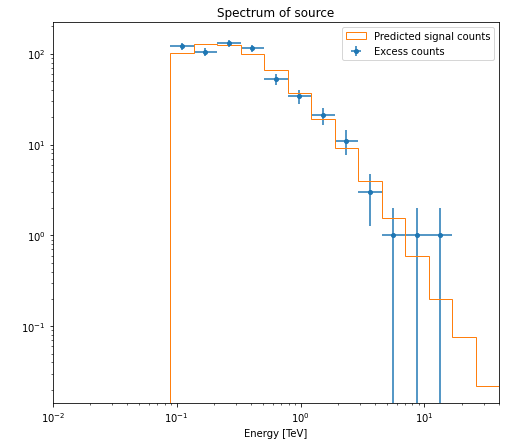

In [11]:
true = spectrum_data(ndata=1)
true.dataset

plt.hist(
    obs_powerlaw.final_sim()['mc_energy'],
    bins= true.binning,
    label="power law"
);



In [ ]:
true = spectrum_data(ndata=1)
true.dataset

plt.hist(
    obs.final_sim()['mc_energy'],
    bins= true.binning,
    label="power law"
);



In [ ]:
true = spectrum_data(ndata=1)
true.dataset

plt.hist(
    obs_cutoff.final_sim()['mc_energy'],
    bins= true.binning,
    label="power law"
);




### Data Frame of simulation data and background

In [12]:
sim = simulation_object(filename_gamma, filename_proton)
src_gauss = source_object(shape="gauss")
obs_gauss = observation(sim, src_gauss)
obs_gauss.final_sim(write=True)
filename = './simulation.h5'
data = pd.read_hdf(filename, key='dl2/event/telescope/parameters/LST_LSTCam')
data

,obs_id,event_id,intensity,log_intensity,x,y,r,phi,length,length_uncertainty,...,reco_src_x,reco_src_y,signed_time_gradient,signed_skewness,reco_alt,reco_az,reco_type,gammaness,delta_t,dragon_time
2273,1008,3011004,80.741469,1.907097,0.508894,0.239758,0.562545,0.440290,0.090249,0.005232,...,0.153051,0.292588,5.971014,-0.200477,1.227044,3.172602,101,0.420333,0.000149,1.642370e+09
340,1001,2078807,99.593639,1.998232,0.254151,-0.214885,0.332818,-0.701876,0.249269,0.007512,...,0.074054,0.107804,0.668236,0.345484,1.224355,3.152932,101,0.311500,0.000002,1.642370e+09
800,1001,4566507,92.567813,1.966460,0.634717,-0.243897,0.679964,-0.366865,0.149680,0.007740,...,0.074597,0.152631,11.957029,0.488168,1.224354,3.157647,0,0.551333,0.000013,1.642370e+09
1934,1008,1163008,550.061069,2.740411,0.100376,-0.188511,0.213568,-1.081514,0.125720,0.003520,...,0.032015,0.099722,3.593393,0.371710,1.222856,3.152038,0,0.654500,0.000131,1.642370e+09
43,1001,288300,37.652720,1.575796,-0.629585,0.317373,0.705055,2.674671,0.075984,0.005127,...,0.029132,0.196457,6.585282,0.224778,1.222703,3.162163,101,0.432214,0.000106,1.642370e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,1001,1188807,374.466471,2.573413,-0.230213,-0.123843,0.261410,-2.648050,0.208632,0.005935,...,-0.001138,0.213255,2.646451,0.418710,1.221610,3.163855,0,0.687000,0.000202,1.642372e+09
340,1001,2078807,99.593639,1.998232,0.254151,-0.214885,0.332818,-0.701876,0.249269,0.007512,...,0.074054,0.107804,0.668236,0.345484,1.224355,3.152932,101,0.311500,0.000001,1.642372e+09
4305,1016,4507600,37.123269,1.569646,-0.314172,-0.638513,0.711620,-2.028053,0.074225,0.005517,...,0.081827,0.107616,28.081315,-0.664489,1.224632,3.152921,101,0.399167,0.000175,1.642372e+09
59,1001,370708,43.089668,1.634373,-0.425392,-0.063314,0.430078,-2.993841,0.074595,0.004181,...,-0.016815,0.132778,14.382119,0.193742,1.221099,3.155434,101,0.489405,0.000031,1.642372e+09


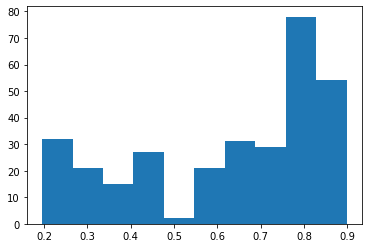

In [13]:
plt.hist(
    data.query("intensity>200")['gammaness'],
    cumulative=False,
    density=False
    
);

In [14]:
len(data.query("intensity>200 & gammaness > 0.5"))

215

In [15]:
obs_gauss.final_background_sim(write=True)
name = './background.h5'
background = pd.read_hdf(name, key='dl2/event/telescope/parameters/LST_LSTCam')
background

,obs_id,event_id,intensity,log_intensity,x,y,r,phi,length,length_uncertainty,...,reco_src_x,reco_src_y,signed_time_gradient,signed_skewness,reco_alt,reco_az,reco_type,gammaness,delta_t,dragon_time
514,1025,1913000,50.184528,1.700570,-0.582852,0.692929,0.905465,2.270125,0.054626,0.005515,...,-0.326196,1.024481,1.130206,-0.463869,1.208303,3.244927,101,0.292222,0.000098,1.642370e+09
655,1025,8446504,39.750697,1.599345,-0.021354,0.198336,0.199482,1.678050,0.074292,0.006447,...,-0.411588,0.304115,0.455024,-0.712440,1.206875,3.172108,101,0.396667,0.000002,1.642370e+09
575,1025,4778805,120.362796,2.080492,-0.719159,0.467026,0.857498,2.565635,0.081771,0.004649,...,-0.726960,0.203597,1.784496,0.327351,1.195700,3.161435,101,0.342083,0.000006,1.642370e+09
96,1003,4027906,172.749344,2.237416,0.201441,-0.640671,0.671594,-1.266162,0.196805,0.004771,...,0.057380,-0.275587,0.119372,0.019524,1.223646,3.112660,101,0.320667,0.000052,1.642370e+09
251,1014,1263808,193.340781,2.286323,0.723291,0.239483,0.761907,0.319741,0.103935,0.004584,...,0.598813,-0.027541,-3.912973,0.582338,1.243115,3.138537,101,0.406833,0.000085,1.642370e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,1003,7074200,51.818987,1.714489,-0.937610,-0.307261,0.986672,-2.824915,0.087086,0.007206,...,-1.788935,-0.896691,19.281257,0.335395,1.156643,3.062104,0,0.547833,0.000040,1.642372e+09
105,1003,4487701,180.338711,2.256089,-0.539973,-0.953790,1.096032,-2.085942,0.133224,0.004857,...,-1.050273,-0.872774,-3.262053,-0.170984,1.183013,3.059139,101,0.330167,0.000028,1.642372e+09
254,1014,1560106,649.522509,2.812594,-0.026539,-0.423643,0.424474,-1.633360,0.428321,0.011210,...,0.800729,-0.240155,10.044106,0.184444,1.250218,3.114382,101,0.475833,0.000041,1.642372e+09
204,1003,9272503,95.238579,1.978813,0.452529,0.066892,0.457446,0.146756,0.088217,0.004654,...,0.317445,0.308846,3.730359,-0.197973,1.232895,3.174869,101,0.345833,0.000004,1.642372e+09


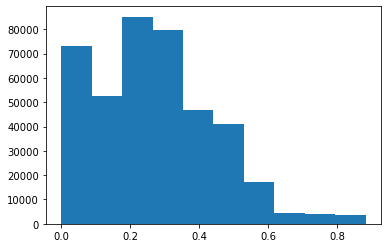

In [16]:
plt.hist(
    background.query("intensity>200")['gammaness'],
    cumulative=False,
    density=False
    
);

In [33]:
#obs_gauss.total(write=True)
#name = './dl2_LST-1.Run99999.h5'
#total = pd.read_hdf(name, key='dl2/event/telescope/parameters/LST_LSTCam')
total, index = obs_gauss.final_sim(write=False)

In [34]:
total = total.query('gammaness > 0.8')
total

,obs_id,event_id,intensity,log_intensity,x,y,r,phi,length,length_uncertainty,...,reco_src_x,reco_src_y,signed_time_gradient,signed_skewness,reco_alt,reco_az,reco_type,gammaness,delta_t,dragon_time
713,1001,4168203,1179.560168,3.071720,-0.233130,0.313882,0.390988,2.209629,0.202968,0.004638,...,0.063338,0.164319,-1.427443,0.620975,1.223945,3.158857,0,0.885167,0.000096,1.642370e+09
713,1001,4168203,1179.560168,3.071720,-0.233130,0.313882,0.390988,2.209629,0.202968,0.004638,...,0.063338,0.164319,-1.427443,0.620975,1.223945,3.158857,0,0.885167,0.000136,1.642370e+09
713,1001,4168203,1179.560168,3.071720,-0.233130,0.313882,0.390988,2.209629,0.202968,0.004638,...,0.063338,0.164319,-1.427443,0.620975,1.223945,3.158857,0,0.885167,0.000061,1.642370e+09
713,1001,4168203,1179.560168,3.071720,-0.233130,0.313882,0.390988,2.209629,0.202968,0.004638,...,0.063338,0.164319,-1.427443,0.620975,1.223945,3.158857,0,0.885167,0.000182,1.642370e+09
2350,1008,3466200,1743.389984,3.241395,-0.146303,0.559881,0.578680,1.826391,0.229770,0.005052,...,0.068916,0.300054,1.718435,1.232349,1.224033,3.173129,0,0.800929,0.000075,1.642371e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,1001,4168203,1179.560168,3.071720,-0.233130,0.313882,0.390988,2.209629,0.202968,0.004638,...,0.063338,0.164319,-1.427443,0.620975,1.223945,3.158857,0,0.885167,0.000138,1.642371e+09
713,1001,4168203,1179.560168,3.071720,-0.233130,0.313882,0.390988,2.209629,0.202968,0.004638,...,0.063338,0.164319,-1.427443,0.620975,1.223945,3.158857,0,0.885167,0.000030,1.642372e+09
713,1001,4168203,1179.560168,3.071720,-0.233130,0.313882,0.390988,2.209629,0.202968,0.004638,...,0.063338,0.164319,-1.427443,0.620975,1.223945,3.158857,0,0.885167,0.000048,1.642372e+09
713,1001,4168203,1179.560168,3.071720,-0.233130,0.313882,0.390988,2.209629,0.202968,0.004638,...,0.063338,0.164319,-1.427443,0.620975,1.223945,3.158857,0,0.885167,0.000052,1.642372e+09


In [36]:
index

array([  43,  635,  864, 3164, 4305,  713, 3902,  187,  800,  805,  149,
       3334,   43, 1449, 1546, 2798, 1398,   43,  635,  713, 1034, 1934,
       2273, 1449, 2798,  713,   43, 1228, 1135, 3902, 2710, 2145, 3902,
       1893,  365,   43, 2710, 3631,  573,   43, 4305,   82, 2710, 1034,
       1893, 1934,  713,  340, 3157, 4225,  864, 3631,  340, 4305,  186,
        149, 3157, 3902,  186, 1033, 1546,  800,  800, 2350,  409, 1033,
       2351, 2124,  369, 1734,  186, 1546, 4305,   43,  962, 3902, 1398,
       1934,  635, 2124,  713,  187, 3703,  573, 4370, 4305,  635,  986,
       2556,  340,  713, 1299, 3902, 2710, 2351,  986, 2787,  986,  519,
         43,  713,  340, 2710, 2710,  573,   43, 3164, 3154, 2900, 4305,
       3631, 1893,  573,  800, 3396, 2710, 2783,  713, 1934, 1033, 4305,
       1893, 1934,  635, 2710,  713, 1034,  540, 3851,  186, 2798,   82,
       1173,  986,   59, 4305, 4182, 2798,  926,  864, 2350, 2273,  149,
        220, 1934, 2124, 2124,  340, 3703, 1569,  9

In [35]:
# sim.data.iloc[index].query('gammaness > 0.8')

,obs_id,event_id,intensity,log_intensity,x,y,r,phi,length,length_uncertainty,...,reco_disp_dx,reco_disp_dy,reco_src_x,reco_src_y,signed_time_gradient,signed_skewness,reco_alt,reco_az,reco_type,gammaness
713,1001,4168203,1179.560168,3.071720,-0.233130,0.313882,0.390988,2.209629,0.202968,0.004638,...,0.296468,-0.149564,0.063338,0.164319,-1.427443,0.620975,1.223945,3.158857,0,0.885167
713,1001,4168203,1179.560168,3.071720,-0.233130,0.313882,0.390988,2.209629,0.202968,0.004638,...,0.296468,-0.149564,0.063338,0.164319,-1.427443,0.620975,1.223945,3.158857,0,0.885167
713,1001,4168203,1179.560168,3.071720,-0.233130,0.313882,0.390988,2.209629,0.202968,0.004638,...,0.296468,-0.149564,0.063338,0.164319,-1.427443,0.620975,1.223945,3.158857,0,0.885167
713,1001,4168203,1179.560168,3.071720,-0.233130,0.313882,0.390988,2.209629,0.202968,0.004638,...,0.296468,-0.149564,0.063338,0.164319,-1.427443,0.620975,1.223945,3.158857,0,0.885167
2350,1008,3466200,1743.389984,3.241395,-0.146303,0.559881,0.578680,1.826391,0.229770,0.005052,...,0.215219,-0.259827,0.068916,0.300054,1.718435,1.232349,1.224033,3.173129,0,0.800929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,1001,4168203,1179.560168,3.071720,-0.233130,0.313882,0.390988,2.209629,0.202968,0.004638,...,0.296468,-0.149564,0.063338,0.164319,-1.427443,0.620975,1.223945,3.158857,0,0.885167
713,1001,4168203,1179.560168,3.071720,-0.233130,0.313882,0.390988,2.209629,0.202968,0.004638,...,0.296468,-0.149564,0.063338,0.164319,-1.427443,0.620975,1.223945,3.158857,0,0.885167
713,1001,4168203,1179.560168,3.071720,-0.233130,0.313882,0.390988,2.209629,0.202968,0.004638,...,0.296468,-0.149564,0.063338,0.164319,-1.427443,0.620975,1.223945,3.158857,0,0.885167
713,1001,4168203,1179.560168,3.071720,-0.233130,0.313882,0.390988,2.209629,0.202968,0.004638,...,0.296468,-0.149564,0.063338,0.164319,-1.427443,0.620975,1.223945,3.158857,0,0.885167


In [140]:
obs_gauss.src_object.shape = 'disk' 
obs_gauss.src_object.rmax = 0.2 * u.deg 
obs_gauss.src_object.src_area()

wspt = obs_gauss.spatial_weights(
    obs_gauss.sim_object.cam_x, obs_gauss.sim_object.cam_y
)
# wspt = wspt / wspt.sum()
np.unique(wspt)

array([False,  True])

<Quantity 30.>

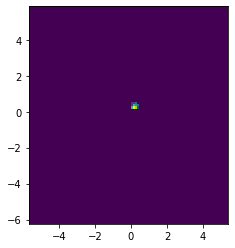

In [141]:
counts, xedges, yedges = np.histogram2d(
    obs_gauss.sim_object.cam_x,
    obs_gauss.sim_object.cam_y,
    weights=wspt,
    bins=100
)
plt.figure(figsize=(4,4))
plt.subplot(111, aspect='equal')
plt.pcolormesh(
    xedges.to('deg').value,
    yedges.to('deg').value,
    counts.transpose()
)
counts.sum()

In [142]:
mc_energy = obs_gauss.sim_object.mc_energy
# weights_tot = obs_gauss.weighting() # observation.weighting(self)[1] * observation.weighting(self)[0] * observation.weighting(self)[2]
wspc = obs_gauss.tobs * obs_gauss.src_object.spectrum(obs_gauss.sim_object.mc_energy) / obs_gauss.sim_object.powerlaw_MC_data()
weights_tot = wspc * wspt 
weights_tot *= wspc.sum() / weights_tot.sum()
probability = weights_tot / weights_tot.sum()

n_expected_events = int(weights_tot.sum())
index = np.random.choice(
    np.arange(len(mc_energy)),
    size=n_expected_events,
    p=probability
)

index.size, np.unique(index).size, n_expected_events, weights_tot.sum()

(291, 28, 291, <Quantity 291.04419086>)

In [143]:
total = sim.data.iloc[index]

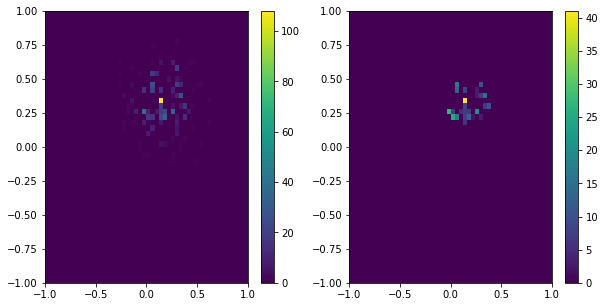

In [144]:
f = 28 * u.m
x_gauss = (data['reco_src_x'].to_numpy() * u.m / f) * u.rad 
y_gauss = (data['reco_src_y'].to_numpy() * u.m / f) * u.rad  

x_gauss2 = (total['reco_src_x'].to_numpy() * u.m / f) * u.rad 
y_gauss2 = (total['reco_src_y'].to_numpy() * u.m / f) * u.rad  

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.hist2d(
    x_gauss.to('deg').value,
    y_gauss.to('deg').value,
    bins=50,
    range=[(-1,1), (-1,1)],
);
plt.colorbar()
plt.subplot(122)
plt.hist2d(
    x_gauss2.to('deg').value,
    y_gauss2.to('deg').value,
    bins=50,
    range=[(-1,1), (-1,1)],
);
plt.colorbar()


### Calcul 

TypeError: tuple indices must be integers or slices, not str

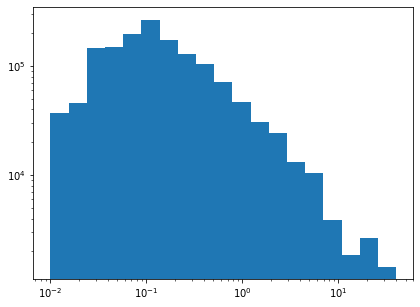

In [20]:
plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.semilogy()
plt.semilogx()
plt.hist(
    sim.mc_energy_proton.value,
    bins= binning,
    weights = obs.background_weighting(),
    label="proton"
)
plt.hist(
    obs.final_sim()['mc_energy'],
    bins= binning,
    label="gamma"
)
plt.legend();

In [ ]:
gaussian_data = obs_gauss.final_sim()
disk_data =obs_disk.final_sim()
ring_data = obs_ring.final_sim()




plt.figure(figsize=(20, 5))

f=27 * u.m 
x_gauss = (gaussian_data['reco_src_x'].to_numpy() * u.m / f) * u.rad 
y_gauss = (gaussian_data['reco_src_y'].to_numpy() * u.m / f) * u.rad  

x_disk = (disk_data['reco_src_x'].to_numpy() * u.m / f) * u.rad 
y_disk = (disk_data['reco_src_y'].to_numpy() * u.m / f) * u.rad  

x_ring = (ring_data ['reco_src_x'].to_numpy() * u.m / f) * u.rad 
y_ring = (ring_data ['reco_src_y'].to_numpy() * u.m / f) * u.rad  

print("Center")
print(obs.center_camera()[0] *u.deg)
print(obs.center_camera()[1] *u.deg)



print(x_disk.max().to('deg'))

print("Gaussian")

print(x_gauss.to('deg').value.mean())
print(y_gauss.to('deg').value.mean())
print(np.sqrt(x_gauss.to('deg').value.var())*1.5)
print(np.sqrt(y_gauss.to('deg').value.var())*1.5)

plt.subplot(131)
plt.hist2d(
    x_gauss.to('deg').value,
    y_gauss.to('deg').value,
    bins=50,
)
plt.title("gauss")
plt.colorbar()
#plt.xlim(-1,1)
#plt.ylim(-1,1);

print("Disk")

print(x_disk.to('deg').value.mean())
print(y_disk.to('deg').value.mean())
print(np.sqrt(x_disk.to('deg').value.var()))
print(np.sqrt(y_disk.to('deg').value.var()))

plt.subplot(132)
plt.hist2d(
    x_disk.to('deg').value,
    y_disk.to('deg').value,
    bins=50,
)
plt.title("disk")
plt.colorbar();
#plt.xlim(-1,1)
#plt.ylim(-1,1)

print("Ring")

print(x_ring.to('deg').value.mean())
print(y_ring.to('deg').value.mean())
print(np.sqrt(x_ring.to('deg').value.var()))
print(np.sqrt(y_ring.to('deg').value.var()))

plt.subplot(133)
plt.hist2d(
    x_ring.to('deg').value,
    y_ring.to('deg').value,
    bins=50,
)
plt.title("ring")
plt.colorbar()
#plt.xlim(-1,1)
#plt.ylim(-1,1);

In [ ]:
f=27 * u.m 
x_gauss = (gaussian_data['reco_src_x'].to_numpy() * u.m / f) * u.rad 
y_gauss = (gaussian_data['reco_src_y'].to_numpy() * u.m / f) * u.rad  

x_disk = (disk_data['reco_src_x'].to_numpy() * u.m / f) * u.rad 
y_disk = (disk_data['reco_src_y'].to_numpy() * u.m / f) * u.rad  

x_ring = (ring_data ['reco_src_x'].to_numpy() * u.m / f) * u.rad 
y_ring = (ring_data ['reco_src_y'].to_numpy() * u.m / f) * u.rad  




plt.figure(figsize=(16, 5))

plt.subplot(131, aspect='equal')
plt.hist2d(
    sim.cam_x.to('deg').value,
    sim.cam_y.to('deg').value,
    bins=110,
    weights= obs_disk.spatial_weights(sim.cam_x, sim.cam_y),
    #vmax=20
)
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.title('Disk')
plt.colorbar();

plt.subplot(132, aspect='equal')
plt.hist2d(
    sim.cam_x.to('deg').value,
    sim.cam_y.to('deg').value,
    bins=110,
    weights= obs_ring.spatial_weights(sim.cam_x, sim.cam_y),
    #vmax=20
)
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.title('Ring')
plt.colorbar();

plt.subplot(133, aspect='equal')
plt.hist2d(
    sim.cam_x.to('deg').value,
    sim.cam_y.to('deg').value,
    bins=110,
    weights= obs_gauss.spatial_weights(sim.cam_x, sim.cam_y),
    #vmax=20
)
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.title('Gaussian')
plt.colorbar();

plt.figure(figsize=(20, 5))

plt.subplot(131)
plt.hist2d(
    x_disk.to('deg').value,
    y_disk.to('deg').value,
    bins=110,
)
plt.title("Disk")
plt.colorbar();
#plt.xlim(-2,2)
#plt.ylim(-2,2);

plt.subplot(132)
plt.hist2d(
    x_ring.to('deg').value,
    y_ring.to('deg').value,
    bins=110,
)
plt.title("Ring")
plt.colorbar();
#plt.xlim(-2,2)
#plt.ylim(-2,2);

plt.subplot(133)
plt.hist2d(
    x_gauss.to('deg').value,
    y_gauss.to('deg').value,
    bins=110,
)
plt.title("Gaussian")
plt.colorbar();
#plt.xlim(-2,2)
#plt.ylim(-2,2);




In [ ]:
new_obs = observation(sim,src,time_start='2022-01-16T23:00:00', time_stop='2022-01-16T23:20:00' )
trajectory = pointing(sim,src,new_obs, Zd_size= 20, Az_size= 30)

In [ ]:
az_tel = (sim.data['az_tel'].to_numpy() * u.rad).to(u.deg).value
zd_tel = ( 90 * u.deg - (sim.data['alt_tel'].to_numpy() * u.rad).to(u.deg) ).value

events = trajectory.events(az_tel, zd_tel)